Nine stocks are:

TREX STMP ENPH IPGP NICE TNC MANH CYBR VOO

Statistics Meaning:

Mean | is the average. It is the sum / n

Median | is the number in the middle of n

Variance | is the distribution of n, it explains how random variables differ from expected

S.D. | measures the volatility of a data set, it is the square root of the variance

Skewness | refers to the distortion of normal distrinbution in a data set. It describes the appeanance.

Kurtosis | describes the weight of a distribution that is held in the tails

In [3]:
!pip install pandas-datareader

In [6]:
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-05 17:24:45.988272


In [7]:
data_dict = {}
stocks = ["TREX", "STMP", "ENPH", "IPGP", "NICE", "TNC", "MANH", "CYBR", "VOO"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [8]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,VOO
Date,,,,,,,,,
2012-01-03,2.882500,26.260000,NaN,35.330002,34.630001,39.750000,10.095000,NaN,116.599998
2012-01-04,2.903750,25.570000,NaN,35.930000,34.000000,40.020000,9.942500,NaN,116.800003
2012-01-05,2.923750,25.580000,NaN,37.970001,34.669998,40.720001,9.990000,NaN,117.180000
2012-01-06,2.887500,25.790001,NaN,38.759998,34.450001,39.360001,9.975000,NaN,116.940002
2012-01-09,2.878750,25.100000,NaN,39.419998,34.220001,37.790001,10.030000,NaN,117.120003
...,...,...,...,...,...,...,...,...,...
2021-09-29,104.839996,329.799988,148.399994,159.100006,280.649994,74.629997,152.839996,158.729996,399.459991
2021-09-30,101.930000,329.790009,149.970001,158.399994,284.040009,73.949997,153.029999,157.820007,394.399994
2021-10-01,101.290001,329.600006,155.360001,161.119995,278.160004,75.730003,155.690002,159.550003,399.119995


In [9]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total


def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_ 


def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1]) 
    return median_


def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_


def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    return variance_


def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)


def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    # insert variables into formula
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [10]:

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

In [11]:

price_change_data = close_data.pct_change() * 100
stats_df = gather_statistics(price_change_data)
stats_df

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,VOO
mean,0.183,0.188,0.265,0.093,0.096,0.046,0.138,0.141,0.055
median,0.165,0.082,0.000,0.147,0.082,0.076,0.171,0.138,0.069
variance,7.521,16.557,28.254,6.490,2.369,3.736,5.281,9.610,1.067
S.D.,2.742,4.069,5.315,2.548,1.539,1.933,2.298,3.100,1.033
skewness,0.001,-0.000,0.001,-0.000,-0.000,0.000,0.001,0.000,0.000
kurtosis,17.074,94.431,10.937,16.315,12.856,9.467,17.085,12.053,23.442


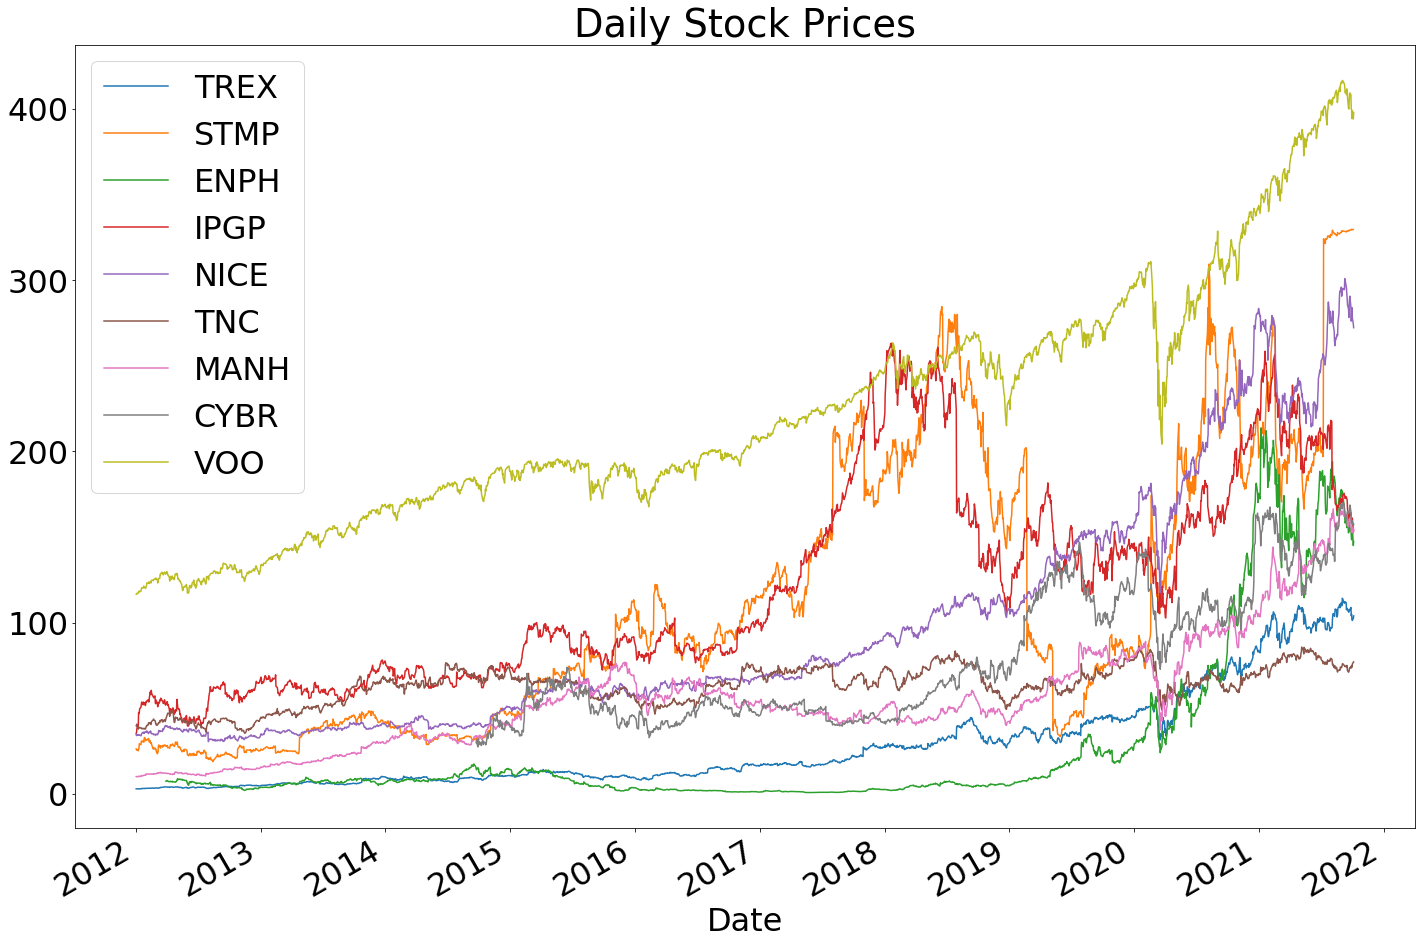

In [12]:

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices")
plt.show()
plt.close()

<ipython-input-13-c7c1cc75fbe2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


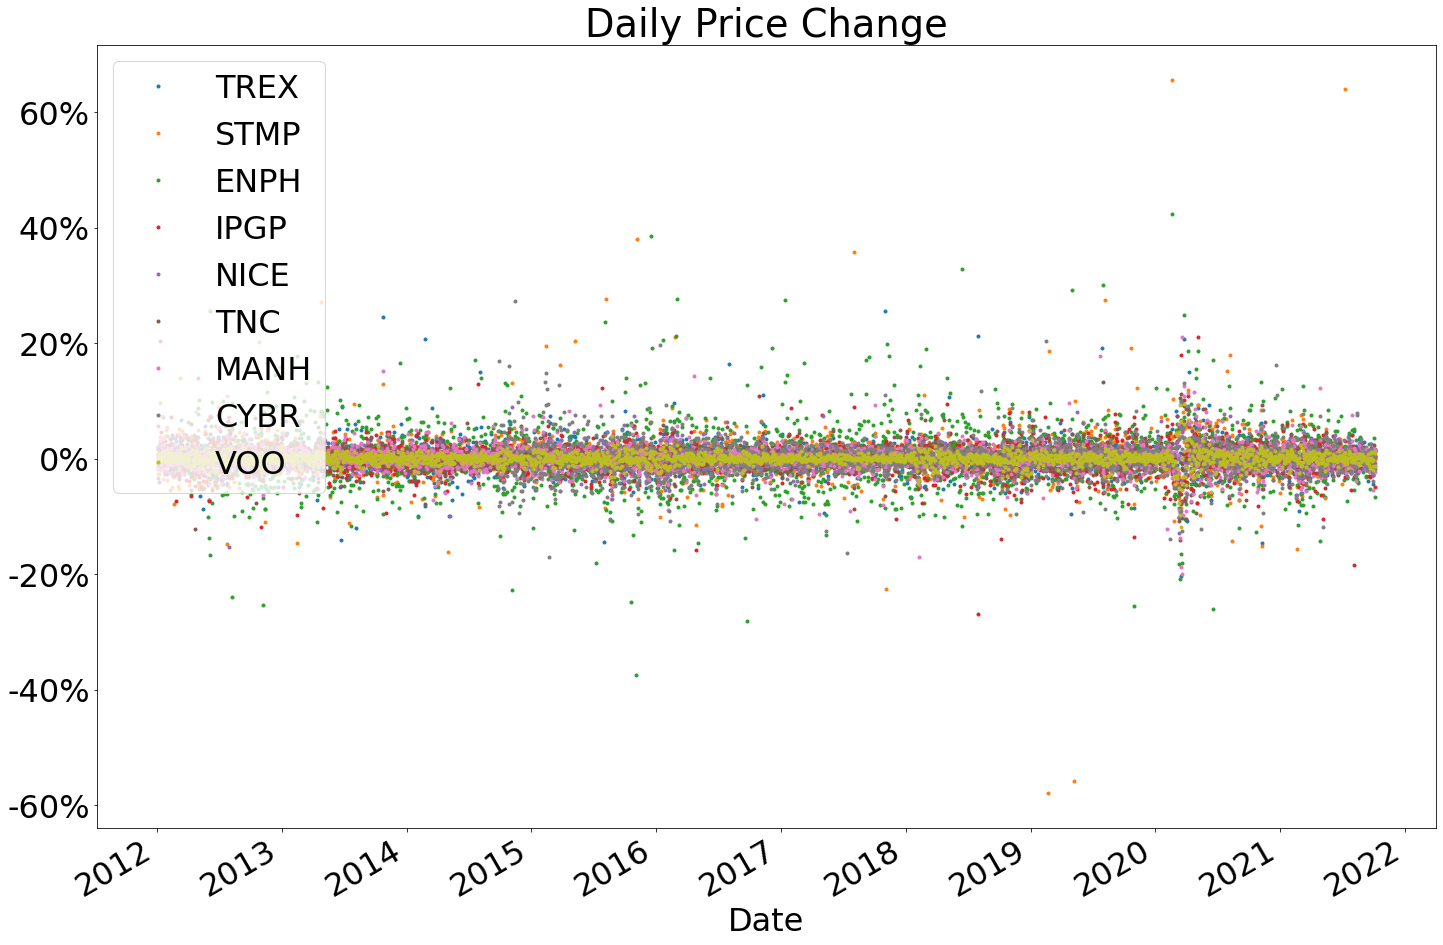

In [13]:

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:

    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)

plt.legend()
# Title of graph
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

<ipython-input-14-af7c8a79c525>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


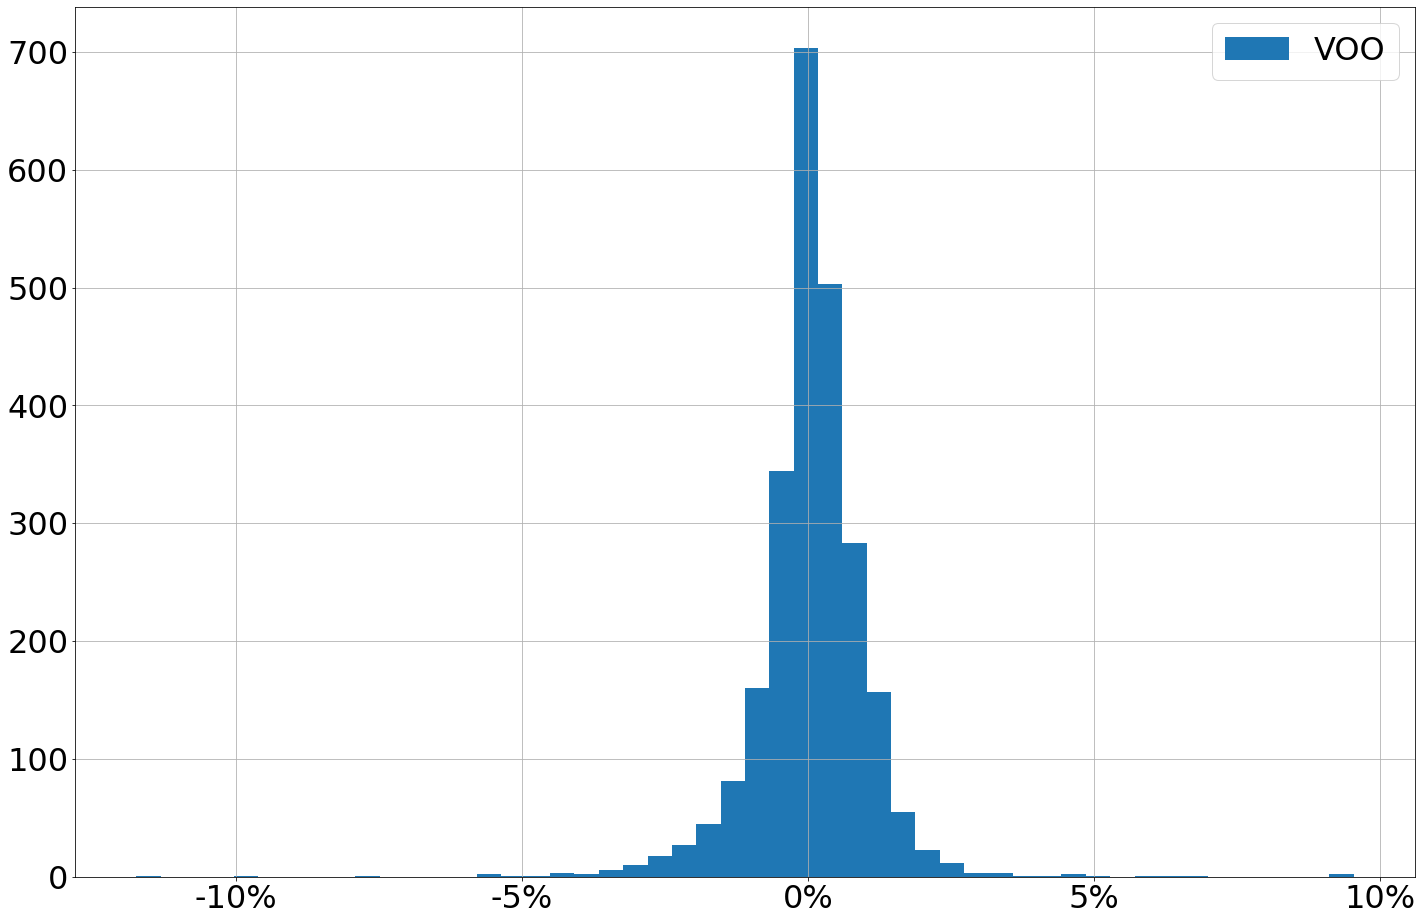

In [14]:
# THis is plotting the deviation of based off of price
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["VOO"].hist(bins = 50, label = "VOO")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])   

plt.legend()

<ipython-input-15-9474c074cbec>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-15-9474c074cbec>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


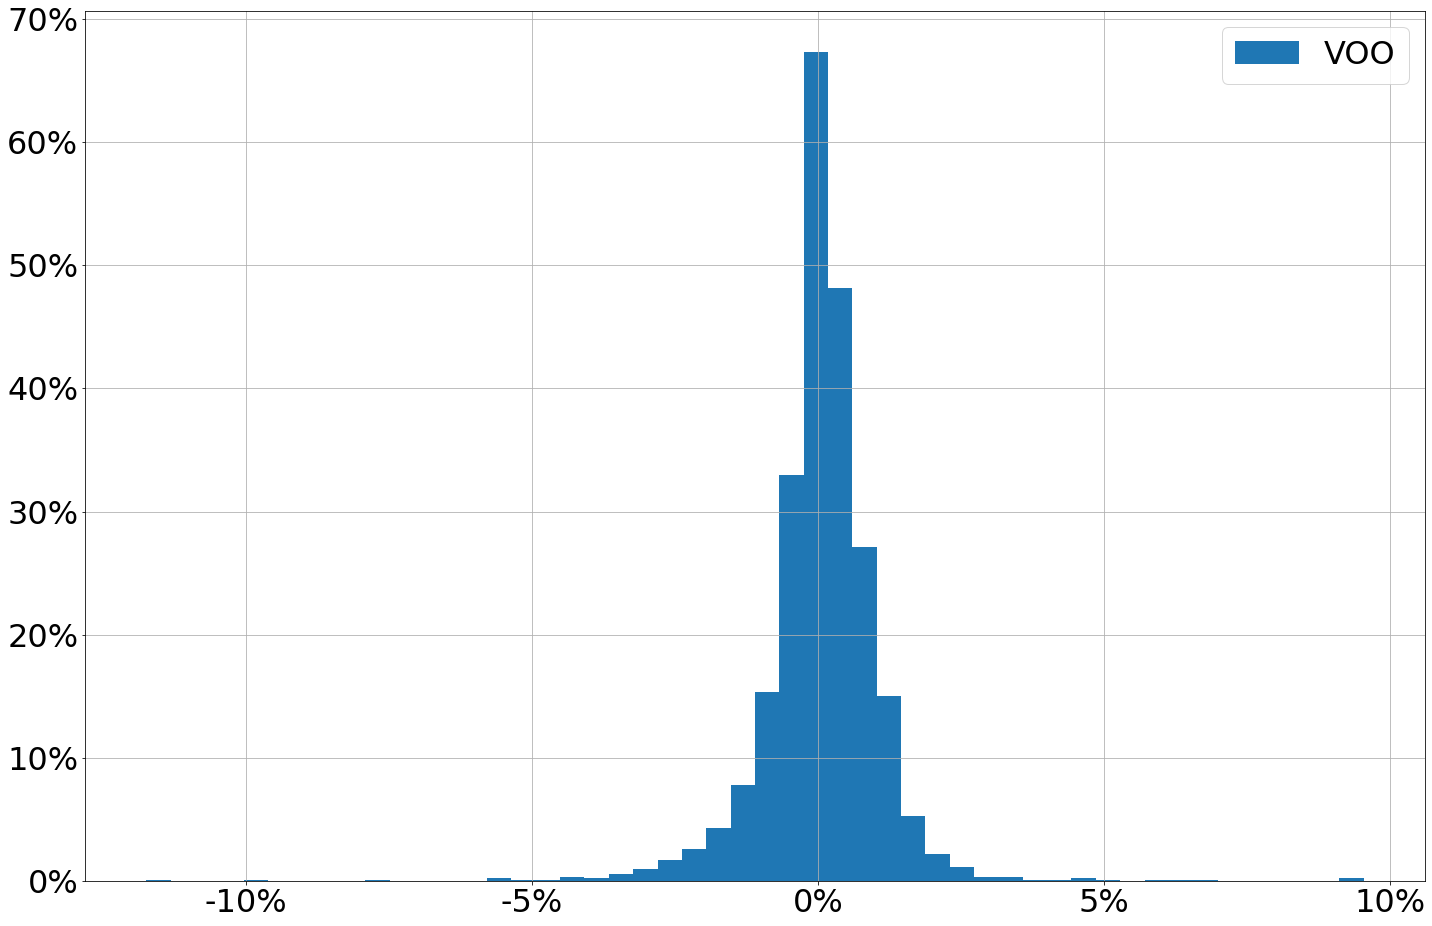

In [15]:

fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["VOO"].hist(bins = 50, label = "VOO", density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

<ipython-input-17-a8c4f3ed6ce4>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-17-a8c4f3ed6ce4>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


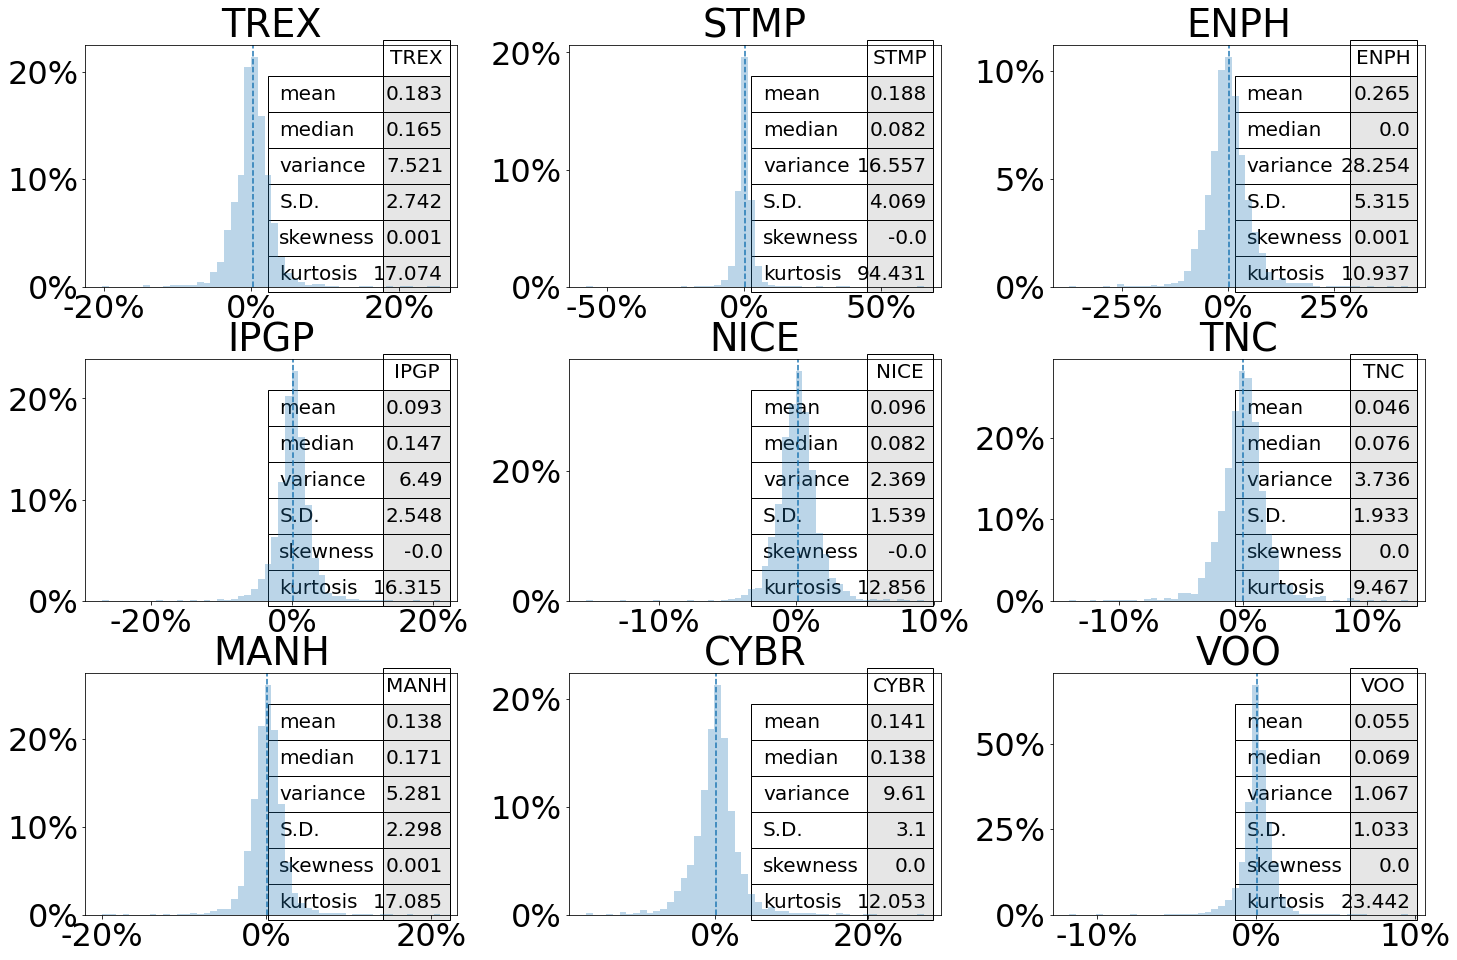

In [17]:

from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (24,16))
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        hist_data = stats_df[stock]
        
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        
        stats.scale(1.8,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        
        a.axvline(x = hist_data.loc["mean"], ls="--")
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
       
        a.grid(False)
        
plt.show()

<ipython-input-18-c06f09082766>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-18-c06f09082766>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


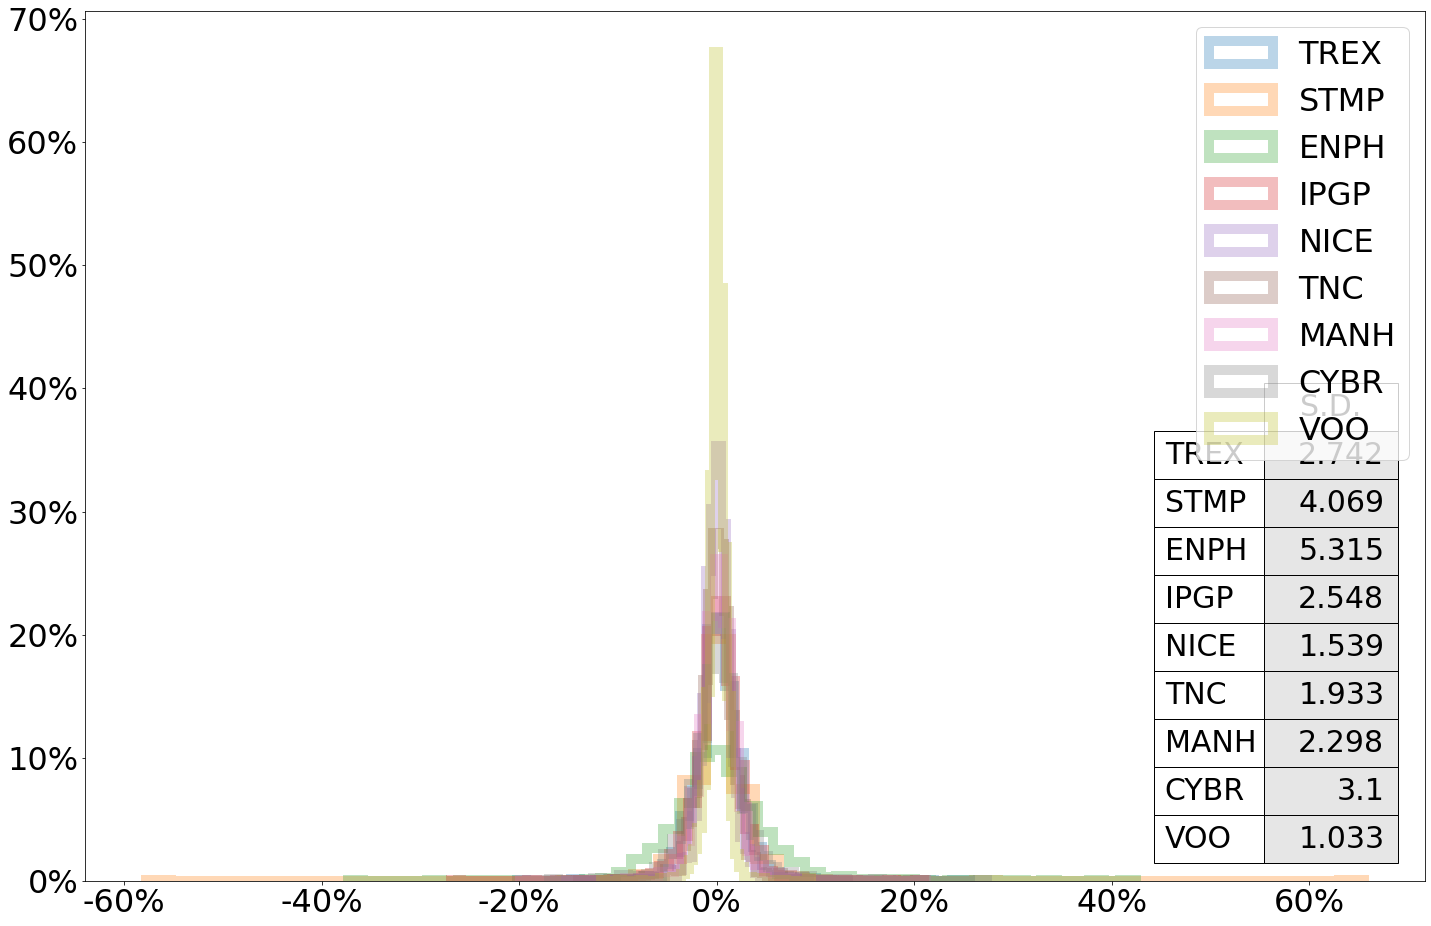

In [18]:

fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)
    
x_vals = ax.get_xticks()

ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "lower right")

stats.scale(1,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

The height and standard deviation of each distribution suggests that the order of stocks in terms of volatility, from least to most, are VOO, NICE, TNC, MANH, IPGP, TREX, CYBR, STMP, AND ENPH. This could be due to enph being in a more volitile sector and having more risk underlying its niche products. "They sell microinverters." It also makes since that VOO would have the least amount of volatility due to it being an ETF. Also, there are more variables to explain each one distribution, age, size, roi, sector, and others to think of a few. However it is to be noted that the 2 highest returning holdings had the largest volatility.